# Datathon #5 - Clustering

In [5]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

For this datathon we'll be working with data about LEGO construction sets. 

LEGO data comes from Rebrickable (https://rebrickable.com) via Kaggle (https://www.kaggle.com/rtatman/lego-database).
The database contains all data in the Rebrickable database for sets released up to mid-2017 (almost all sets ever). 

We're giving you two simplified versions of the larger dataset.

**(File 1) LEGO Colors** — Contains data on all of the different colors of LEGO pieces ever released. 
- Unique pieces = How many different kinds of bricks have been produced in the color.
- Unique sets = How many different LEFO sets have included bricks in the color.
- Unique themes = How many different LEGO themes ("Town", "Space", "Ninjago", "Harry Potter", etc.) have included the color.
- Number of years = How many years have had sets with the color.
- Max set size = How big was the biggest set that includes the color. 
- Median set size = How big was the median set that includes the color.

In [7]:
lego_colors = pd.read_csv("Lego Colors Data.tab.txt",delimiter="\t")
lego_colors.head()

,Color,Number of Unique Pieces,Number of Unique Sets,Number of Unique Themes,Number of Years,Max Set Size,Median Set Size
0,Aqua,55,48,15,10,1305,73
1,Black,4367,8333,373,60,5922,330
2,Blue,1822,5279,342,65,5922,300
3,Blue-Violet,35,17,3,2,987,165
4,Bright Green,257,726,131,24,5200,155


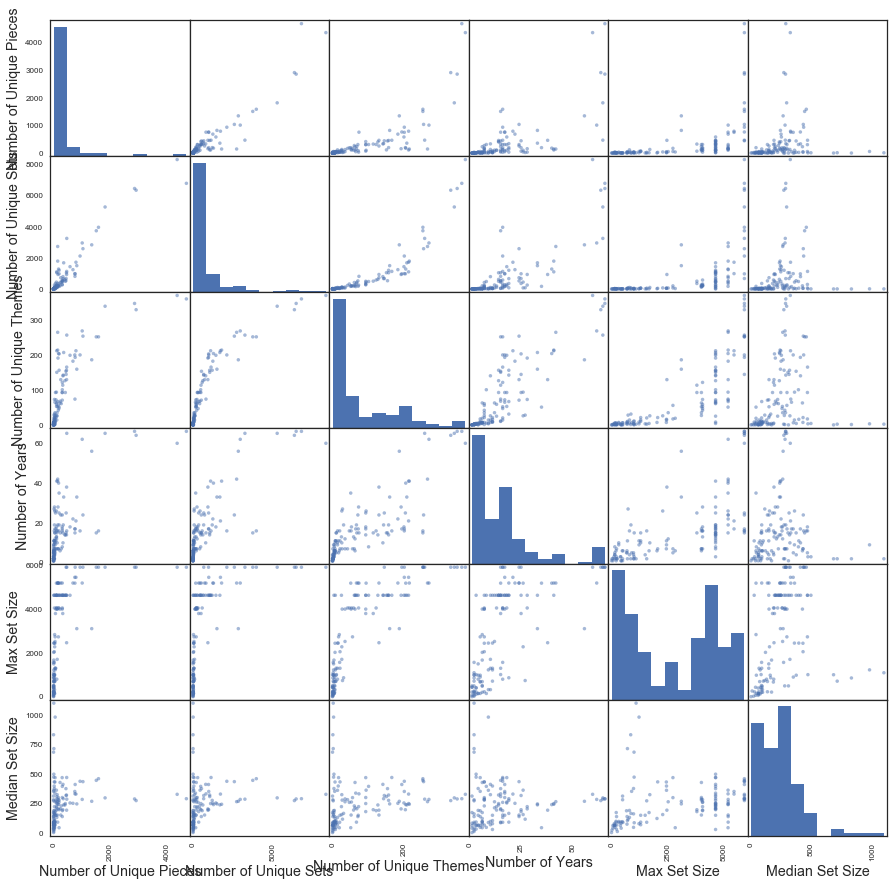

In [8]:
_ = pd.plotting.scatter_matrix(lego_colors, figsize=(15,15))

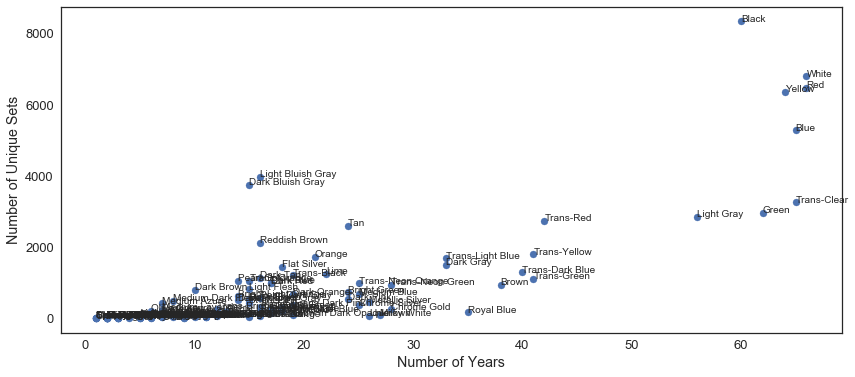

In [5]:
# Plot two dimensions with color names
plt.figure(figsize=(14,6))
plt.scatter(lego_colors["Number of Years"], lego_colors["Number of Unique Sets"])
plt.xlabel('Number of Years')
plt.ylabel('Number of Unique Sets')

for i, row in enumerate(lego_colors.values):
    plt.annotate(row[0],xy=(row[4],row[2]),fontsize=10)

**(File 2) LEGO Colors by Set** — Contains data on the colors of the pieces in each LEGO set.

- Set Num = A unique alphanumeric ID number for each set. 
- Set Name = The official name of the set (some names are reused for more than one set).
- Year = The year the set was released.
- Num Parts = Total number of parts listed on the box.
- [Colors] = Number of parts of each color in the set, according to the Rebrickable database.

You can also get more data about individual sets by going to http://rebrickable.com/sets/{SetNum}

In [300]:
set_colors = pd.read_excel("Set Color Data.xlsx")
set_colors.fillna(0,inplace=True)
set_colors.head()

,Set Num,Set Name,Year,Num Parts,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,...,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
0,2015775,Dragon Fortress,2003,741,39.0,0.0,199.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,0.0
1,2015410,Scorpion Palace,2003,354,25.0,0.0,45.0,4.0,0.0,2.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,89.0,20.0,0.0
2,1089-1,Lego Basic Figures - 24 elements,1985,24,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015045,Temple of Mount Everest,2003,288,24.0,0.0,67.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,26.0,0.0
4,2823692,Simple and Motorized Machines Activity Pack,1997,24,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Questions**

1. Using the first data file ("Lego Colors Data.tab.txt") use hierarchical clustering to find groups of colors that have similar characteristics. What **data columns**, **distance metric**, and **distance threshold** do you think give the best result?
2. Using the same data file, use k-means clustering to find groups of colors that have similar characteristics. What **set of data columns** and what **value of k** do you think gives the best result?
3. Using the second data file ("Set Color Data.xlsx") — in what year did LEGO release the largest number of colors? The largest number of sets?

**  +2 more analysis questions of your own** (using either dataset). 

# Q1:

In [384]:
# Rough analysis of how many colours there are in the first place:
len(lego_colors['Color'].unique())

130

In [156]:
# Split color column (by " " character) into new dataframe and extract most significant word:
color_test = pd.DataFrame(columns=['A','B','C','D'])
color_test[['A','B','C','D']] = lego_colors['Color'].str.split(' ', None, expand=True)
color_test['E'] = np.where(pd.isnull(color_test['D']), color_test['C'], color_test['D'])
color_test['F'] = np.where(pd.isnull(color_test['E']), color_test['B'], color_test['E'])
color_test['G'] = np.where(pd.isnull(color_test['F']), color_test['A'], color_test['F'])
#color_test.loc[color_test['G'] == 'Unknown']

# Repeat above procedure on "-" character:
colors = pd.DataFrame(columns=['A','B'])
colors[['A','B']] = color_test['G'].str.split('-', None, expand=True)
colors['Final'] = np.where(pd.isnull(colors['B']), colors['A'], colors['B'])

# Determine number of unique "most significant colours":
unique = colors['Final'].unique()
print("Number of colors:", len(unique), "\n\n", unique)

Number of colors: 30 

 ['Aqua' 'Black' 'Blue' 'Violet' 'Green' 'Orange' 'Yellow' 'Pink' 'Brown'
 'Brass' 'Gold' 'Silver' 'Copper' 'Azure' 'Gray' 'Flesh' 'Purple' 'Red'
 'Tan' 'Turquoise' 'Clear' 'Opaque' 'Trans' 'White' 'Lavender' 'Lime'
 'Salmon' 'Magenta' 'Rust' 'Unknown']


In [157]:
# Remove 'Color' field:
my_lego_colors = lego_colors.drop(['Color'], axis=1)

In [158]:
# Compute distance matrix:
dist_xy = spd.squareform(spd.pdist(my_lego_colors, metric='euclidean'))
dist_xy.shape

(130, 130)

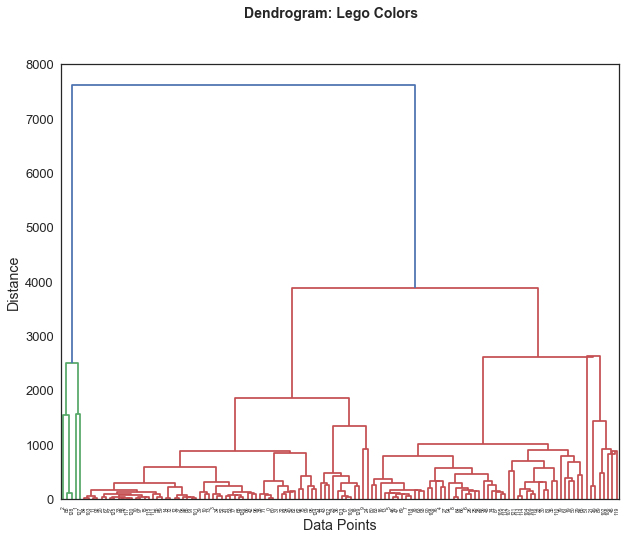

In [390]:
# Perform hierarchical clustering and plot the dendrogram.
Z_xy = sph.linkage(my_lego_colors, method='centroid')  # obtain the linkage matrix

_ = sph.dendrogram(Z_xy)  # plot the linkage matrix as a dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.suptitle('Dendrogram: Lego Colors', 
             fontweight='bold', fontsize=14);

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [160]:
# Compute clusters and add cluster labels to the dataframe:
cluster_labels = sph.fcluster(Z_xy, 460.0, criterion='distance')
my_lego_colors['cluster_label'] = cluster_labels

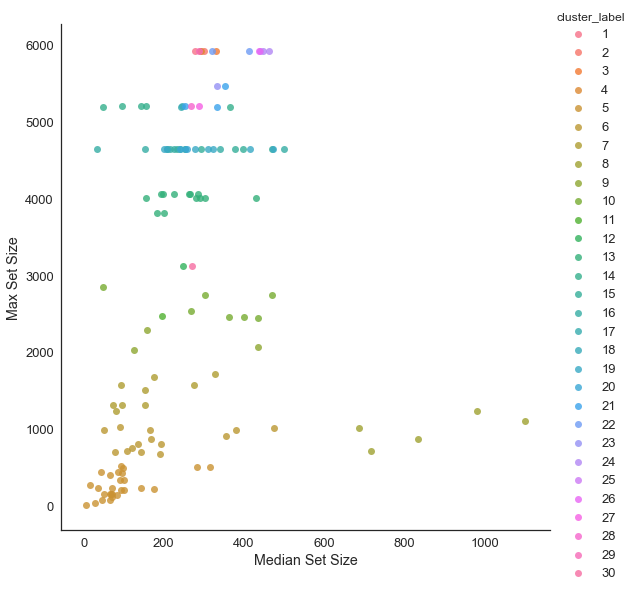

In [391]:
# Test Plot:
sns.lmplot(x='Median Set Size', y='Max Set Size', hue='cluster_label', 
           fit_reg=False, data=my_lego_colors, size=8);

#### - I opted to use all the columns other than 'Color', since we want as much information as possible to differentiate the data.
#### - Since the data is quantitative, Euclidean distance seemed like a reasonable distance metric.
#### - I found that a distance threshold of 460 matches my initial, textual analysis, so that seemed like a decent decision.

# Q2:

In [393]:
# Perform k-means using the scikit-learn package
kmeans_model = skc.KMeans(n_clusters=10)
kmeans_model.fit(my_lego_colors[['Median Set Size','Max Set Size']]) #.drop(['cluster_label','cluster_labels_kmeans'], axis=1))
centroids = kmeans_model.cluster_centers_
#centroids  # these are the centers of the clusters

Text(0.5,1,'Median vs. Max Set Size Clustering with K-means centroids (k=10)')

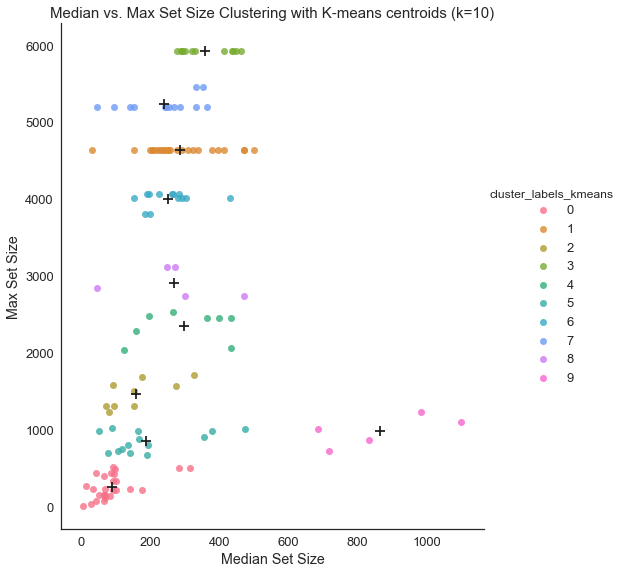

In [396]:
# Plot the clusters with their centroids.
my_lego_colors['cluster_labels_kmeans'] = kmeans_model.labels_
f = sns.lmplot(x='Median Set Size', y='Max Set Size', data=my_lego_colors, hue='cluster_labels_kmeans',
               fit_reg=False, size=8, aspect=0.9)
f.ax.scatter(centroids[:,0], centroids[:,1], marker='+', s=100,
             linewidths=2, color='k');
plt.title('Median vs. Max Set Size Clustering with K-means centroids (k=10)', fontsize=15)

Text(0.5,1,'# Unique Themes vs. Max Set Size Clustering with K-means centroids (k=8)')

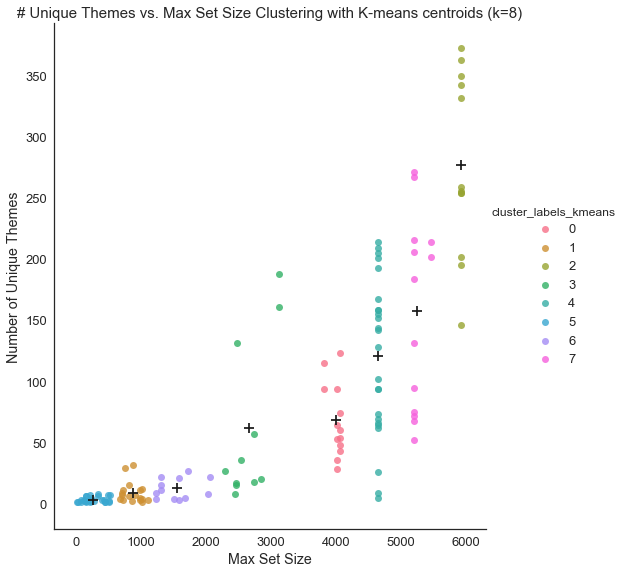

In [397]:
kmeans_model = skc.KMeans(n_clusters=8)
kmeans_model.fit(my_lego_colors[['Max Set Size','Number of Unique Themes']])
centroids = kmeans_model.cluster_centers_

my_lego_colors['cluster_labels_kmeans'] = kmeans_model.labels_
f = sns.lmplot(x='Max Set Size', y='Number of Unique Themes', data=my_lego_colors, hue='cluster_labels_kmeans',
               fit_reg=False, size=8, aspect=0.9)
f.ax.scatter(centroids[:,0], centroids[:,1], marker='+', s=100,
             linewidths=2, color='k');
plt.title('# Unique Themes vs. Max Set Size Clustering with K-means centroids (k=8)', fontsize=15)

## Number of Unique Themes vs. Max Set Size with k=8 is one of the best results that I was able to find... in terms of both,
### a) having a scatter plot with visibly apparent clusters, and
### b) naturalness of the model's clustering compared to the scatterplot

# Q3:

Using the second data file ("Set Color Data.xlsx") — in what year did LEGO release the largest number of colors? The largest number of sets?

In [301]:
set_colors.head(2)

,Set Num,Set Name,Year,Num Parts,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,...,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
0,2015775,Dragon Fortress,2003,741,39.0,0.0,199.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,0.0
1,2015410,Scorpion Palace,2003,354,25.0,0.0,45.0,4.0,0.0,2.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,89.0,20.0,0.0


## In which year did LEGO release the largest number of colours?

In [304]:
year_colors = []
for year in set_colors['Year'].unique():
        
    colors = []
    for index, row in set_colors.iterrows():
        if row['Year'] != year:
            continue
        
        for i in range(4,len(row)):
            if row[i] != 0:
                if set_colors.columns[i] not in colors:
                    colors.append(set_colors.columns[i])
    
    year_colors.append((year, len(colors)))

colors_by_year = pd.DataFrame(year_colors, columns=['Year','Num Colors'])

In [305]:
colors_by_year.sort_values('Num Colors', ascending=False).head(1)

,Year,Num Colors
11,2005,98


# In 2005!

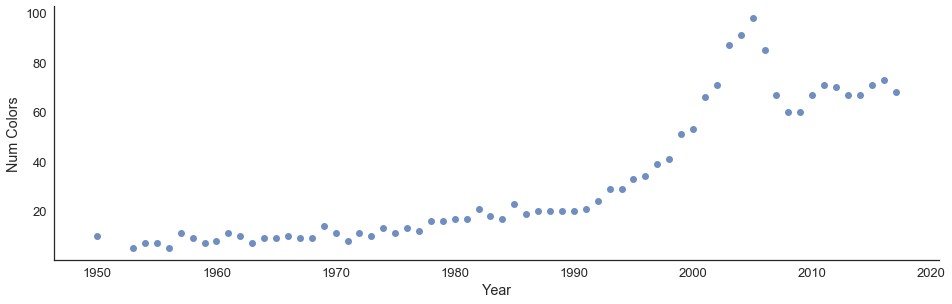

In [404]:
_ = sns.lmplot(x='Year', y='Num Colors', data=colors_by_year, size=4.5, aspect=3.0, fit_reg=False)

## In which year did LEGO release the largest number of sets?

In [259]:
sets_by_year = set_colors['Set Num'].groupby(set_colors['Year']).size().to_frame()
sets_by_year.columns = ['# of Sets']
sets_by_year.sort_values('# of Sets', ascending=False).head(1)

,# of Sets
Year,
2014,592


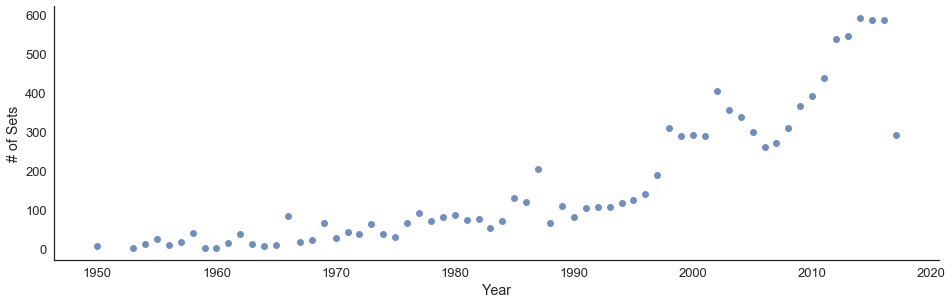

In [405]:
sets_by_year['Year'] = sets_by_year.index
_ = sns.lmplot(x='Year', y='# of Sets', data=sets_by_year, size=4.5, aspect=3.0, fit_reg=False)

## In 2014!

In [322]:
most_parts = set_colors[['Set Name', 'Year', 'Num Parts']].sort_values('Num Parts', ascending=False)
most_parts.head(10)

,Set Name,Year,Num Parts
7626,Taj Mahal,2008,5922
1351,Star Wars / M&M Mosaic - Promo Set,2005,5461
10162,Window Exploration Bag,2010,5200
7619,Millennium Falcon - UCS,2007,5195
297,Firehouse Headquarters,2016,4640
8430,Personalised Mosaic Portrait,2016,4501
7640,Tower Bridge,2010,4295
7663,Big Ben,2016,4166
961,The Disney Castle,2016,4060
1005,Death Star,2016,4023


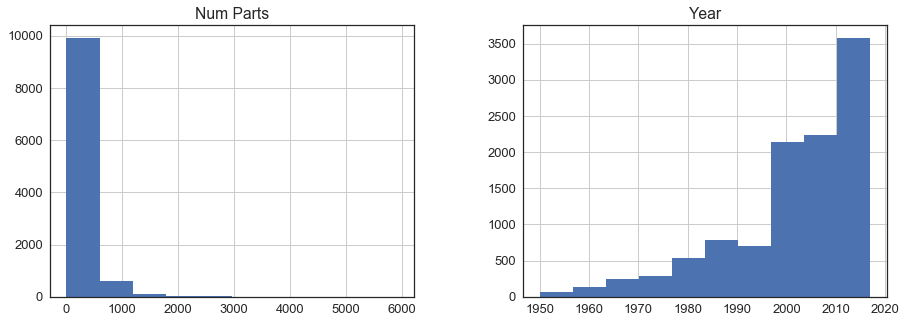

In [328]:
_ = most_parts.hist(figsize=(15,5))

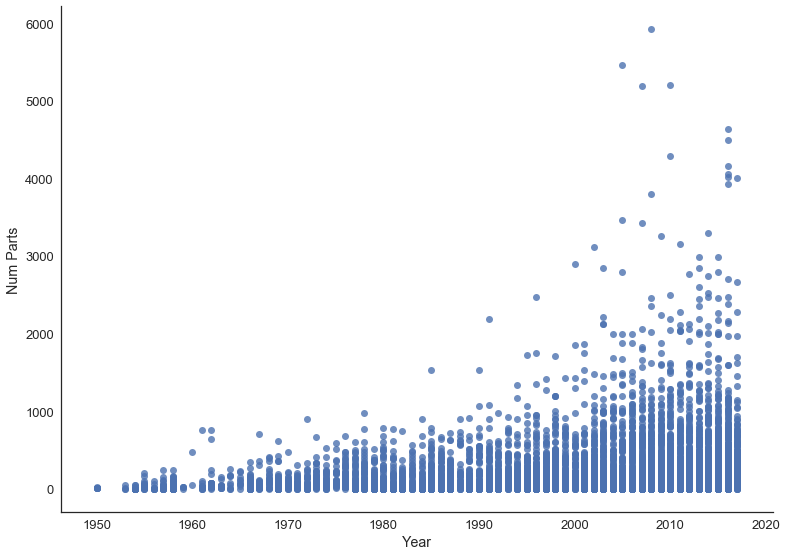

In [410]:
_ = sns.lmplot(x='Year', y='Num Parts', data=most_parts, size=8, aspect=1.4, fit_reg=False)